<a href="https://colab.research.google.com/github/asnielrod/Lineal_Regression_BT_P/blob/main/AlertStance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf

In [74]:
from tensorflow.keras.layers import BatchNormalization


In [75]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [35]:
import os

In [36]:
import cv2
import imghdr

In [37]:
from matplotlib import pyplot as plt

In [38]:
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  1


In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [7]:
len(gpus)

1

In [41]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
import cv2

In [43]:
import imghdr

In [44]:
data_dir = 'drive/MyDrive/data'
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 13004 files belonging to 2 classes.


In [45]:
os.listdir(data_dir)

['Stable', 'Falls']

In [46]:
image_exts = ['jpeg','jpg','bmp','png']

In [47]:
for image_class in os.listdir(data_dir):
  print(image_class)

Stable
Falls


In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")
                

In [ ]:
#load data
tf.data.Dataset??

In [48]:
import numpy as np

In [49]:
data


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
data_iterator = data.as_numpy_iterator()

In [51]:
batch = data_iterator.next()

In [20]:
#images represented as numpay arrays
batch[0].shape


(32, 256, 256, 3)

In [21]:
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

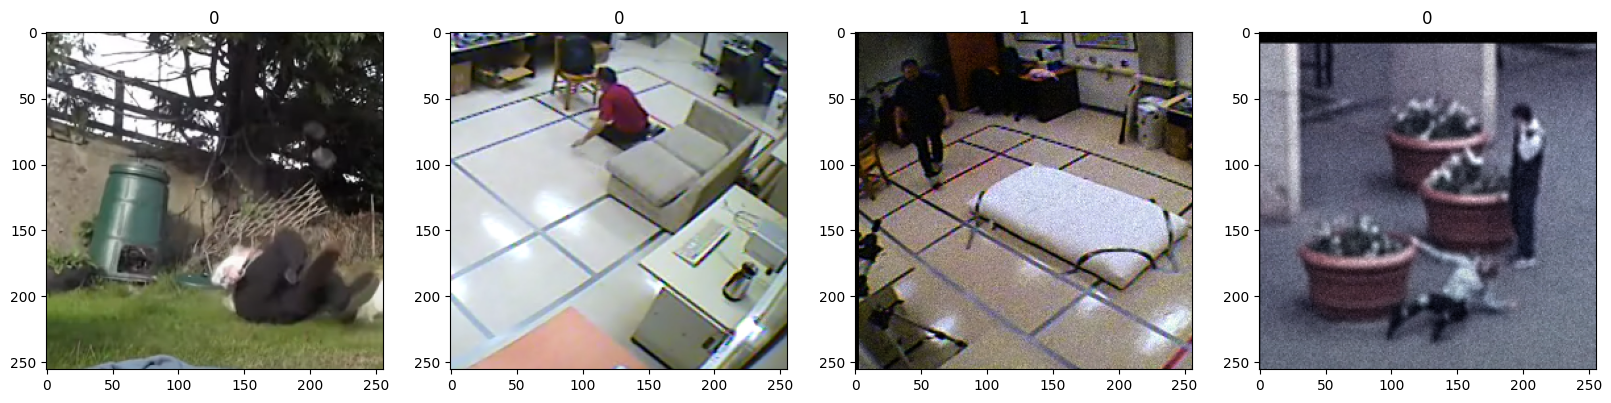

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [53]:
scaled = batch[0] / 255


In [55]:
scaled.min()

0.0

In [56]:
data = data.map(lambda x, y: (x/255, y))

In [57]:
scaled_iterator = data.as_numpy_iterator()

In [58]:
batch = scaled_iterator.next()

In [83]:
batch[0].max()

1.0

In [62]:
len(data)

407

In [63]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [64]:
train_size

284

In [65]:
val_size

81

In [66]:
test_size

40

In [67]:
train_size+val_size+test_size

405

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [69]:
len(val)

81

In [70]:
#build deep learning model
from tensorflow.keras.models import Sequential


In [71]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [72]:
model = Sequential()

In [76]:
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [77]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
30*30*16

14400

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     2

In [80]:
logdir = 'logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
284/284 [==============================] - 358s 1s/step - loss: 7.2191 - accuracy: 0.7061 - val_loss: 3.0201 - val_accuracy: 0.5127
Epoch 2/20
284/284 [==============================] - 301s 1s/step - loss: 0.8586 - accuracy: 0.7349 - val_loss: 1.1321 - val_accuracy: 0.6817
Epoch 3/20
284/284 [==============================] - 342s 1s/step - loss: 0.4785 - accuracy: 0.8002 - val_loss: 0.4191 - val_accuracy: 0.8484
Epoch 4/20
284/284 [==============================] - 306s 1s/step - loss: 0.3702 - accuracy: 0.8464 - val_loss: 0.3210 - val_accuracy: 0.8665
Epoch 5/20
284/284 [==============================] - 348s 1s/step - loss: 0.2963 - accuracy: 0.8824 - val_loss: 0.2789 - val_accuracy: 0.8777
Epoch 6/20
284/284 [==============================] - 345s 1s/step - loss: 0.2582 - accuracy: 0.9035 - val_loss: 0.4028 - val_accuracy: 0.8445
Epoch 7/20
284/284 [==============================] - 313s 1s/step - loss: 0.2275 - accuracy: 0.9097 - val_loss: 0.4557 - val_accuracy: 0.7778

In [84]:
hist.history

{'loss': [7.219075679779053,
  0.8586412668228149,
  0.47845110297203064,
  0.3702085018157959,
  0.2963027358055115,
  0.25815075635910034,
  0.22745737433433533,
  0.17790833115577698,
  0.16440650820732117,
  0.16678056120872498,
  0.17340411245822906,
  0.12653771042823792,
  0.11301068961620331,
  0.11702258139848709,
  0.11337542533874512,
  0.1328851878643036,
  0.09077882021665573,
  0.06412214785814285,
  0.07439465075731277,
  0.07430258393287659],
 'accuracy': [0.7060959339141846,
  0.7349251508712769,
  0.8001760840415955,
  0.8463908433914185,
  0.8823723793029785,
  0.9034991264343262,
  0.9096611142158508,
  0.9350792169570923,
  0.9433318376541138,
  0.9419013857841492,
  0.9416813254356384,
  0.9559859037399292,
  0.9635783433914185,
  0.9609375,
  0.9658890962600708,
  0.9588468074798584,
  0.9715008735656738,
  0.9789832830429077,
  0.97810298204422,
  0.9768925905227661],
 'val_loss': [3.0200841426849365,
  1.1320830583572388,
  0.4190913140773773,
  0.3209561407566

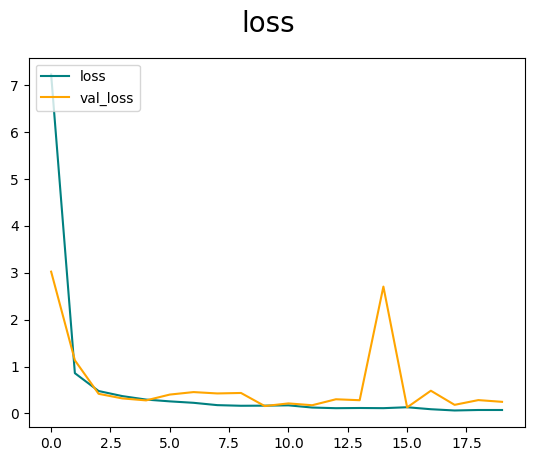

In [85]:
#plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc = 'upper left')
plt.show()